## Crow Search Algorithm

In [1]:
import warnings 
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px 
import pandas as pd  
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import train_test_split  
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import recall_score 
from sklearn.utils import resample  
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay 
from math import * 
import math 
import random 
import os 
%matplotlib inline
sns.set_style('darkgrid')


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import random
import math
import time
from datetime import timedelta
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score
from scipy import spatial
from scipy.spatial.distance import cosine
from sklearn import svm
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('heart project.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
# df = df.drop(['id'],axis=1)

# df.columns = ['diagnosis','radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean','radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst']


# df['diagnosis'][df['diagnosis'] == 'M'] = 0
# df['diagnosis'][df['diagnosis'] == 'B'] = 1

scale = StandardScaler()

x = df.drop(['target'], axis=1)
y = df['target']
x=scale.fit_transform(x)
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state = 42)

# Adaboost

In [5]:
data = pd.read_csv("heart project.csv")

data_columns = data.drop(['target'],axis=1)


label = data['target'].values
from sklearn import preprocessing
normalized_data = preprocessing.normalize(data_columns)
for i in range(0,303):
    data_columns.loc[i,('age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope',
                        'ca','thal')]=normalized_data[i]
    
X_train, X_test, y_train, y_test = train_test_split(data_columns,label,test_size=0.20,random_state=42)
clf = AdaBoostClassifier(n_estimators=10)
clf.fit(X_train,y_train)               
y_pred = clf.predict(X_test)

ada_acc= accuracy_score(y_test,y_pred)*100
print("Accuracy for AdaBoost: ",ada_acc)



Accuracy for AdaBoost:  78.53658536585367


In [11]:
#CSA
def fitness(variables_values = []):
    classifier= AdaBoostClassifier(n_estimators=math.ceil(variables_values[1]))
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)*100
    return accuracy
def initial_population(population_size = 30, min_values = [5,1], max_values = [120,3], target_function = fitness):
    population = np.zeros((population_size, len(min_values) + 1))
    for i in range(0, population_size):
        for j in range(0, len(min_values)):
            population[i,j] = random.uniform(min_values[j], max_values[j]) 
        population[i,-1] = target_function(population[i, 0:population.shape[1]-1])
    return population
def update_position(population, ap, fL, min_values = [5,1], max_values = [120,3], target_function = fitness):
    for i in range(0, population.shape[0]):
        idx  = [i for i in range(0, population.shape[0])]
        idx.remove(i)
        idx  = random.choice(idx)
        rand = int.from_bytes(os.urandom(8), byteorder = 'big') / ((1 << 64) - 1)
        for j in range(0, len(min_values)):
            if (rand >= ap):
                rand_i           = int.from_bytes(os.urandom(8), byteorder = 'big') / ((1 << 64) - 1)
                population[i, j] = np.clip(population[i, j] + rand_i*fL*( population[idx, j] - population[i, j]), min_values[j], max_values[j])
            else:
                population[i,j] = random.uniform(min_values[j], max_values[j]) 
        population[i,-1] = target_function(population[i, 0:population.shape[1]-1])
    return population
def crow_search_algorithm(population_size = 50, ap = 0.02, fL = 2, min_values = [5,1], max_values = [120,3], iterations = 200, target_function = fitness):
    rem=[]
    
    count      = 0
    population = initial_population(population_size, min_values, max_values, target_function)
    best_ind   = np.copy(population[population[:,-1].argsort()][ 0,:])
    while (count <= iterations):  
        population = update_position(population, ap, fL, min_values, max_values, target_function)
        for i in range(0,population_size):
            value      = np.copy(population[i,:])
            rem.append(value)
            if(best_ind[-1] < value[-1]):
                best_ind = value
        count = count + 1 
    best_ind[1]=int(ceil(best_ind[1]))
    return best_ind,rem

In [12]:
resultat_Adaboost=crow_search_algorithm()
resultat_Adaboost

(array([39.49245969,  3.        , 78.53658537]),
 [array([39.49245969,  3.        , 78.53658537]),
  array([94.17336857,  2.73188226, 78.53658537]),
  array([73.74432559,  1.07461027, 74.63414634]),
  array([29.73001719,  2.34292623, 78.53658537]),
  array([36.65141454,  1.39345222, 74.63414634]),
  array([81.57392042,  2.26966164, 78.53658537]),
  array([65.25453265,  2.51751123, 78.53658537]),
  array([38.68677135,  2.29354593, 78.53658537]),
  array([31.13404162,  1.10165312, 74.63414634]),
  array([107.4524699 ,   2.14085368,  78.53658537]),
  array([ 5.        ,  1.        , 75.12195122]),
  array([16.61022308,  2.95597202, 78.53658537]),
  array([40.49586725,  1.3829716 , 74.63414634]),
  array([94.71739575,  1.75942744, 74.63414634]),
  array([91.5583989 ,  1.64390635, 74.63414634]),
  array([57.85718567,  2.74986949, 78.53658537]),
  array([98.88427827,  1.86510227, 74.63414634]),
  array([57.85892156,  2.28928541, 78.53658537]),
  array([ 5.        ,  2.05469118, 78.53658537])

In [13]:
resultat_Adaboost[0]#best position

array([39.49245969,  3.        , 78.53658537])

In [14]:
accuracy_Adaboost_withCSA=resultat_Adaboost[0][2]
accuracy_Adaboost_withCSA

78.53658536585367

# RandomForest

In [15]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(max_depth=5,n_estimators =3)
classifier.fit(x_train, y_train)
y_pred_RF_sans = classifier.predict(x_test)
accuracy_RF_without = accuracy_score(y_test,y_pred_RF_sans)*100
print("accuracy=",accuracy_RF_without)


accuracy= 83.41463414634146


In [16]:
#csa
def fitness(variables_values = [3,8]):
    classifier = RandomForestClassifier(max_depth=math.ceil(variables_values[0]),n_estimators =math.ceil(variables_values[1]))
    classifier.fit(x_train, y_train)
    y_pred_RF_avec= classifier.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred_RF_avec)*100
    return accuracy
def initial_population(population_size = 5, min_values = [2,2], max_values = [100,10], target_function = fitness):
    population = np.zeros((population_size, len(min_values) + 1))
    for i in range(0, population_size):
        for j in range(0, len(min_values)):
            population[i,j] = random.uniform(min_values[j], max_values[j])
        population[i,-1] = target_function(population[i, 0:population.shape[1]-1])
    return population
def update_position(population, ap, fL, min_values = [2,2], max_values = [100,10], target_function = fitness):
    for i in range(0, population.shape[0]):
        idx  = [i for i in range(0, population.shape[0])]
        idx.remove(i)
        idx  = random.choice(idx)
        rand = int.from_bytes(os.urandom(8), byteorder = 'big') / ((1 << 64) - 1)
        for j in range(0, len(min_values)):
            if (rand >= ap):
                rand_i           = int.from_bytes(os.urandom(8), byteorder = 'big') / ((1 << 64) - 1)
                population[i, j] = np.clip(population[i, j] + rand_i*fL*( population[idx, j] - population[i, j]), min_values[j], max_values[j])
            else:
                population[i,j] = random.uniform(min_values[j], max_values[j])
        population[i,-1] = target_function(population[i, 0:population.shape[1]-1])
    return population
def crow_search_algorithm(population_size = 50, ap = 0.02, fL = 2, min_values = [2,2], max_values = [100,10], iterations = 100, target_function = fitness):
    rem=[]
    count      = 0
    population = initial_population(population_size, min_values, max_values, target_function)
    best_ind   = np.copy(population[population[:,-1].argsort()][ 0,:])
    while (count <= iterations):  
        population = update_position(population, ap, fL, min_values, max_values, target_function)
        for i in range(0,population_size):
            value      = np.copy(population[i,:])
            rem.append(value)
            if(best_ind[-1] < value[-1]):
                best_ind = value
        count = count + 1 
    best_ind[1]=int(ceil(best_ind[1]))
    return best_ind,rem

In [17]:
resultat_RF=crow_search_algorithm()
resultat_RF

(array([ 60.81970965,   4.        , 100.        ]),
 [array([40.75774445,  7.06723351, 98.53658537]),
  array([44.45681256,  6.08955249, 98.04878049]),
  array([46.410553  ,  3.13367574, 97.07317073]),
  array([23.29546428,  2.        , 93.17073171]),
  array([70.96311048,  2.13872234, 96.09756098]),
  array([79.76552796,  6.65543133, 97.07317073]),
  array([95.21654128,  5.54020462, 96.09756098]),
  array([ 9.22830394,  7.85535635, 97.07317073]),
  array([48.69526383,  3.07951327, 97.56097561]),
  array([91.18220909,  4.27267199, 98.53658537]),
  array([100.        ,   7.73249532,  98.53658537]),
  array([42.77811411,  2.24140038, 96.09756098]),
  array([88.27156467,  2.75187279, 97.56097561]),
  array([ 60.81970965,   4.        , 100.        ]),
  array([74.20715288,  7.62137909, 98.04878049]),
  array([71.13001733,  6.51590204, 98.53658537]),
  array([ 8.79521695,  4.20704013, 97.56097561]),
  array([44.64277112,  4.64060289, 97.07317073]),
  array([17.10173923,  3.48483801, 96.0975

In [18]:
#best position
resultat_RF[0]

array([ 60.81970965,   4.        , 100.        ])

In [19]:
accuracy_RF_withCSA=resultat_RF[0][2]
accuracy_RF_withCSA

100.0

# Bagging

In [20]:
data = pd.read_csv("heart project.csv")


data_columns = data.drop(['target'],axis=1)


label = data['target'].values
from sklearn import preprocessing
normalized_data = preprocessing.normalize(data_columns)
for i in range(0,303):
    data_columns.loc[i,('age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope',
                        'ca','thal')]=normalized_data[i]
    
X_train, X_test, y_train, y_test = train_test_split(data_columns,label,test_size=0.20,random_state=42)
clf = BaggingClassifier(n_estimators=3)
clf.fit(X_train,y_train)               
y_pred = clf.predict(X_test)

acc= accuracy_score(y_test,y_pred)*100
print("Accuracy for Bagging: ",acc)



Accuracy for Bagging:  91.70731707317074


In [21]:
#CSA
def fitness(variables_values = []):
    classifier= BaggingClassifier(n_estimators=math.ceil(variables_values[1]))
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)*100
    return accuracy
def initial_population(population_size = 30, min_values = [5,1], max_values = [120,3], target_function = fitness):
    population = np.zeros((population_size, len(min_values) + 1))
    for i in range(0, population_size):
        for j in range(0, len(min_values)):
            population[i,j] = random.uniform(min_values[j], max_values[j]) 
        population[i,-1] = target_function(population[i, 0:population.shape[1]-1])
    return population
def update_position(population, ap, fL, min_values = [5,1], max_values = [120,3], target_function = fitness):
    for i in range(0, population.shape[0]):
        idx  = [i for i in range(0, population.shape[0])]
        idx.remove(i)
        idx  = random.choice(idx)
        rand = int.from_bytes(os.urandom(8), byteorder = 'big') / ((1 << 64) - 1)
        for j in range(0, len(min_values)):
            if (rand >= ap):
                rand_i           = int.from_bytes(os.urandom(8), byteorder = 'big') / ((1 << 64) - 1)
                population[i, j] = np.clip(population[i, j] + rand_i*fL*( population[idx, j] - population[i, j]), min_values[j], max_values[j])
            else:
                population[i,j] = random.uniform(min_values[j], max_values[j]) 
        population[i,-1] = target_function(population[i, 0:population.shape[1]-1])
    return population
def crow_search_algorithm(population_size = 50, ap = 0.02, fL = 2, min_values = [5,1], max_values = [120,3], iterations = 100, target_function = fitness):
    rem=[]
    count      = 0
    population = initial_population(population_size, min_values, max_values, target_function)
    best_ind   = np.copy(population[population[:,-1].argsort()][ 0,:])
    while (count <= iterations):  
        population = update_position(population, ap, fL, min_values, max_values, target_function)
        for i in range(0,population_size):
            value      = np.copy(population[i,:])
            rem.append(value)
            if(best_ind[-1] < value[-1]):
                best_ind = value
        count = count + 1 
    best_ind[1]=int(ceil(best_ind[1]))
    return best_ind,rem

In [22]:
resultat_Bagg=crow_search_algorithm()
resultat_Bagg

(array([ 59.86184539,   3.        , 100.        ]),
 [array([107.21580843,   3.        ,  96.58536585]),
  array([62.30715885,  2.83360937, 98.04878049]),
  array([28.94826381,  1.        , 97.56097561]),
  array([56.37489168,  3.        , 96.09756098]),
  array([56.60996402,  3.        , 98.04878049]),
  array([ 5.        ,  2.00798435, 96.58536585]),
  array([25.94636386,  2.66855082, 96.58536585]),
  array([80.79101217,  1.72636822, 93.65853659]),
  array([120.        ,   2.05951456,  95.6097561 ]),
  array([120.        ,   2.2809026 ,  97.07317073]),
  array([27.57263265,  1.55259164, 90.24390244]),
  array([71.87256328,  1.52108857, 87.80487805]),
  array([48.59774208,  2.29978901, 97.56097561]),
  array([52.45322165,  2.79311067, 96.58536585]),
  array([48.22759257,  2.47714867, 95.6097561 ]),
  array([53.3052163 ,  1.98840265, 93.65853659]),
  array([27.0595402 ,  1.66141009, 94.63414634]),
  array([ 7.14150793,  2.12333832, 95.12195122]),
  array([89.50743191,  1.76321736, 96.5

In [23]:
resultat_Bagg[0]

array([ 59.86184539,   3.        , 100.        ])

In [24]:
accuracy_Bagg_withCSA=resultat_Bagg[0][2]
accuracy_Bagg_withCSA

100.0

# Gradient boosting

In [26]:
data = pd.read_csv("heart project.csv")


data_columns = data.drop(['target'],axis=1)


label = data['target'].values
from sklearn import preprocessing
normalized_data = preprocessing.normalize(data_columns)
for i in range(0,303):
    data_columns.loc[i,('age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope',
                        'ca','thal')]=normalized_data[i]
    
X_train, X_test, y_train, y_test = train_test_split(data_columns,label,test_size=0.20,random_state=42)

clf = GradientBoostingClassifier(n_estimators=2)
clf.fit(X_train,y_train)               
y_pred = clf.predict(X_test)

graacc= accuracy_score(y_test,y_pred)*100
print("Accuracy for Gradient Boosting: ",graacc)


Accuracy for Gradient Boosting:  78.53658536585367


In [27]:
#csa
def fitness(variables_values = []):
    classifier = GradientBoostingClassifier(n_estimators =math.ceil(variables_values[1]))
    classifier.fit(x_train, y_train)
    y_pred_RF_avec= classifier.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred_RF_avec)*100
    return accuracy
def initial_population(population_size = 5, min_values = [2,2], max_values = [100,10], target_function = fitness):
    population = np.zeros((population_size, len(min_values) + 1))
    for i in range(0, population_size):
        for j in range(0, len(min_values)):
            population[i,j] = random.uniform(min_values[j], max_values[j])
        population[i,-1] = target_function(population[i, 0:population.shape[1]-1])
    return population
def update_position(population, ap, fL, min_values = [2,2], max_values = [100,10], target_function = fitness):
    for i in range(0, population.shape[0]):
        idx  = [i for i in range(0, population.shape[0])]
        idx.remove(i)
        idx  = random.choice(idx)
        rand = int.from_bytes(os.urandom(8), byteorder = 'big') / ((1 << 64) - 1)
        for j in range(0, len(min_values)):
            if (rand >= ap):
                rand_i           = int.from_bytes(os.urandom(8), byteorder = 'big') / ((1 << 64) - 1)
                population[i, j] = np.clip(population[i, j] + rand_i*fL*( population[idx, j] - population[i, j]), min_values[j], max_values[j])
            else:
                population[i,j] = random.uniform(min_values[j], max_values[j])
        population[i,-1] = target_function(population[i, 0:population.shape[1]-1])
    return population
def crow_search_algorithm(population_size = 50, ap = 0.02, fL = 2, min_values = [2,2], max_values = [100,10], iterations = 100, target_function = fitness):
    rem=[]
    count      = 0
    population = initial_population(population_size, min_values, max_values, target_function)
    best_ind   = np.copy(population[population[:,-1].argsort()][ 0,:])
    while (count <= iterations):  
        population = update_position(population, ap, fL, min_values, max_values, target_function)
        for i in range(0,population_size):
            value      = np.copy(population[i,:])
            rem.append(value)
            if(best_ind[-1] < value[-1]):
                best_ind = value
        count = count + 1 
    best_ind[1]=int(ceil(best_ind[1]))
    return best_ind,rem

In [28]:
resultat_Gra=crow_search_algorithm()
resultat_Gra

(array([67.11207434,  4.        , 79.51219512]),
 [array([67.11207434,  4.        , 79.51219512]),
  array([43.52973095,  8.7676942 , 79.51219512]),
  array([13.73641858, 10.        , 79.51219512]),
  array([34.03953819, 10.        , 79.51219512]),
  array([15.02604973, 10.        , 79.51219512]),
  array([ 8.69417547,  4.14462815, 78.53658537]),
  array([39.40409177,  7.10906408, 79.02439024]),
  array([91.37206808,  2.48380365, 79.51219512]),
  array([46.87366244,  6.85731526, 79.51219512]),
  array([58.93702586,  9.31085636, 79.51219512]),
  array([39.35743107,  3.75765316, 79.51219512]),
  array([64.07040412,  9.3718442 , 79.51219512]),
  array([49.91533221, 10.        , 79.51219512]),
  array([38.67730303,  2.        , 79.51219512]),
  array([43.49418339,  2.55752214, 79.51219512]),
  array([42.82897724,  8.88643719, 79.51219512]),
  array([34.16799744,  7.46826564, 79.02439024]),
  array([40.29865183, 10.        , 79.51219512]),
  array([17.36360106,  5.00659781, 78.53658537]),
 

In [29]:
resultat_Gra[0]

array([67.11207434,  4.        , 79.51219512])

In [30]:
accuracy_Gra_withCSA=resultat_Gra[0][2]
accuracy_Gra_withCSA

79.51219512195122

# Extra trees

In [31]:
data = pd.read_csv("heart project.csv")


data_columns = data.drop(['target'],axis=1)


label = data['target'].values
from sklearn import preprocessing
normalized_data = preprocessing.normalize(data_columns)
for i in range(0,303):
    data_columns.loc[i,('age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope',
                        'ca','thal')]=normalized_data[i]
    
X_train, X_test, y_train, y_test = train_test_split(data_columns,label,test_size=0.20,random_state=42)

clf = ExtraTreesClassifier(n_estimators=3)
clf.fit(X_train,y_train)               
y_pred = clf.predict(X_test)

extacc= accuracy_score(y_test,y_pred)*100
print("Accuracy for Extra Trees: ",extacc)



Accuracy for Extra Trees:  93.65853658536587


In [32]:
#csa
def fitness(variables_values = []):
    classifier = ExtraTreesClassifier(n_estimators =math.ceil(variables_values[1]))
    classifier.fit(x_train, y_train)
    y_pred_RF_avec= classifier.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred_RF_avec)*100
    return accuracy
def initial_population(population_size = 5, min_values = [2,2], max_values = [100,10], target_function = fitness):
    population = np.zeros((population_size, len(min_values) + 1))
    for i in range(0, population_size):
        for j in range(0, len(min_values)):
            population[i,j] = random.uniform(min_values[j], max_values[j])
        population[i,-1] = target_function(population[i, 0:population.shape[1]-1])
    return population
def update_position(population, ap, fL, min_values = [2,2], max_values = [100,10], target_function = fitness):
    for i in range(0, population.shape[0]):
        idx  = [i for i in range(0, population.shape[0])]
        idx.remove(i)
        idx  = random.choice(idx)
        rand = int.from_bytes(os.urandom(8), byteorder = 'big') / ((1 << 64) - 1)
        for j in range(0, len(min_values)):
            if (rand >= ap):
                rand_i           = int.from_bytes(os.urandom(8), byteorder = 'big') / ((1 << 64) - 1)
                population[i, j] = np.clip(population[i, j] + rand_i*fL*( population[idx, j] - population[i, j]), min_values[j], max_values[j])
            else:
                population[i,j] = random.uniform(min_values[j], max_values[j])
        population[i,-1] = target_function(population[i, 0:population.shape[1]-1])
    return population
def crow_search_algorithm(population_size = 50, ap = 0.02, fL = 2, min_values = [2,2], max_values = [100,10], iterations = 100, target_function = fitness):
    rem=[]
    count      = 0
    population = initial_population(population_size, min_values, max_values, target_function)
    best_ind   = np.copy(population[population[:,-1].argsort()][ 0,:])
    while (count <= iterations):  
        population = update_position(population, ap, fL, min_values, max_values, target_function)
        for i in range(0,population_size):
            value      = np.copy(population[i,:])
            rem.append(value)
            if(best_ind[-1] < value[-1]):
                best_ind = value
        count = count + 1 
    best_ind[1]=int(ceil(best_ind[1]))
    return best_ind,rem

In [33]:
resultat_Ext=crow_search_algorithm()
resultat_Ext

(array([ 72.41263399,   5.        , 100.        ]),
 [array([37.95762203,  4.30611411, 98.53658537]),
  array([59.51457286,  3.30150769, 97.07317073]),
  array([ 72.41263399,   5.        , 100.        ]),
  array([ 92.87913042,   4.39109877, 100.        ]),
  array([23.61085564,  7.61569392, 98.53658537]),
  array([ 81.45672029,   6.64470904, 100.        ]),
  array([ 64.64344643,   3.59436994, 100.        ]),
  array([99.56338394,  8.31504516, 98.53658537]),
  array([ 84.90962371,   5.44712483, 100.        ]),
  array([52.71486308,  4.47856102, 98.53658537]),
  array([ 63.11542461,  10.        , 100.        ]),
  array([19.53437887,  3.91644351, 98.53658537]),
  array([100.        ,   4.70252131, 100.        ]),
  array([68.4718022 ,  3.52538463, 98.53658537]),
  array([74.47578153,  2.84300845, 98.53658537]),
  array([27.20450478,  5.199002  , 98.53658537]),
  array([34.26425743,  7.79041754, 98.53658537]),
  array([ 2.        ,  4.16628186, 98.53658537]),
  array([ 69.80861669,   6.

In [34]:
resultat_Ext[0]

array([ 72.41263399,   5.        , 100.        ])

In [35]:
accuracy_Ext_withCSA=resultat_Ext[0][2]
accuracy_Ext_withCSA

100.0

## Evaluation 


In [36]:
y1 = [ada_acc, accuracy_RF_without, acc, graacc, extacc] 
y2 = [accuracy_Adaboost_withCSA, accuracy_RF_withCSA, accuracy_Bagg_withCSA, accuracy_Gra_withCSA, accuracy_Ext_withCSA]

<AxesSubplot:xlabel='0', ylabel='1'>

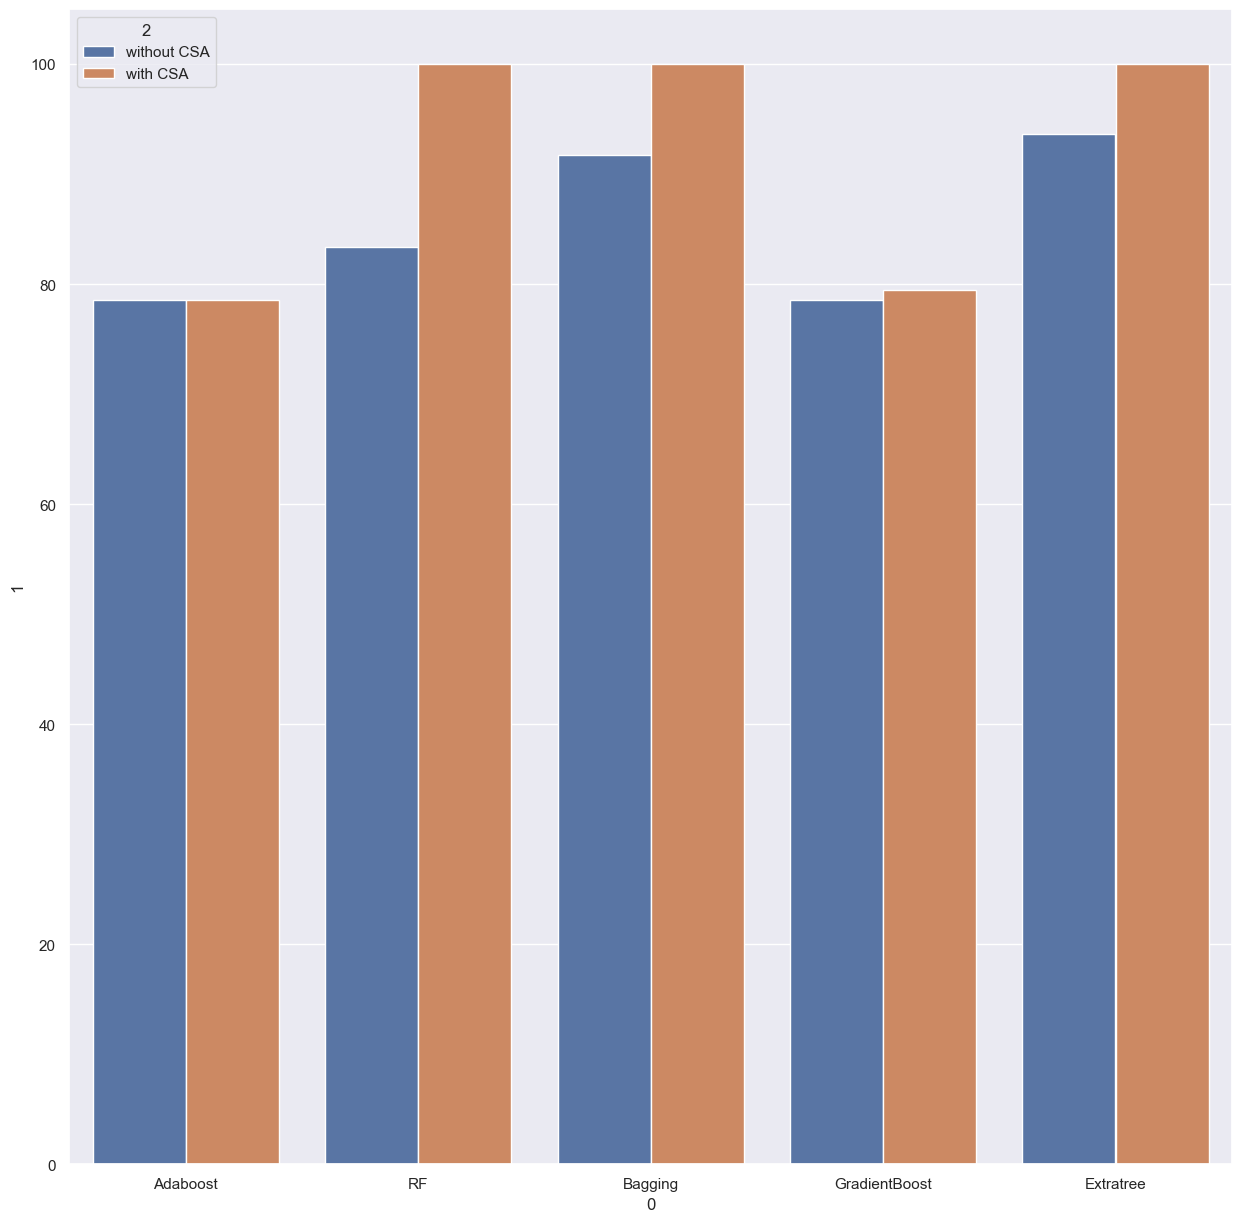

In [37]:
ds=[['Adaboost',y1[0],'without CSA'],['Adaboost',y2[0],'with CSA'],['RF',y1[1],'without CSA'],['RF',y2[1],'with CSA'],['Bagging',y1[2],'without CSA'],['Bagging',y2[2],'with CSA'],['GradientBoost',y1[3],'without CSA'],['GradientBoost',y2[3],'with CSA'],['Extratree',y1[4],'without CSA'],['Extratree',y2[4],'with CSA']]
ds=pd.DataFrame(ds)
sns.set(rc={'figure.figsize':(15,15)})
sns.barplot(data=ds, x=0, y=1, hue=2)